# Data Cleaning and Validation Challenge

**Background:** This dataset consists of open-source articles and prices paid by Wellcome. There are 5 fields: ID, Publisher, Journal title, article title and cost. However, for the purposes of this challenge, I will use only 3 fields: Journal title, article title and cost. 

Also, initially there are 2127 rows. However, after cleaning the data, there will most likely be less rows.

In [1]:
# Import Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
%matplotlib inline

In [2]:
# Upload dataset and format correctly.
df = pd.read_csv('lesson.csv',encoding="iso-8859-1")

# Get a view of the dataset.
df

,PMID/PMCID,Publisher,Journal title,Article title,Cost
0,PMC3378987\n,Elsevier,Academy of Nutrition and Dietetics,Parent support and parent mediated behaviours ...,£2379.54
1,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
2,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78
3,NaN,American Chemical Society,ACS Chemical Biology,Discovery of ?2 Adrenergic Receptor Ligands Us...,£947.07
4,PMID: 24015914 PMC3833349,American Chemical Society,ACS Chemical Biology,Discovery of an allosteric inhibitor binding s...,£1267.76
5,: PMC3805332,American Chemical Society,ACS Chemical Biology,Synthesis of alpha-glucan in mycobacteria invo...,£2286.73
6,PMCID:\n PMC3656742\n,American Chemical Society,ACS Chemical Neuroscience,Continuous online microdialysis using microflu...,£1186.80
7,PMCID: 3584654,AMERICAN CHEMICAL SOCIETY,ACS NANO,HYDROXY-TERMINATED CONJUGATED POLYMER NANOPART...,£642.89
8,23373658,American Chemical Society Publications,ACS Nano,Skin dendritic cell targeting via microneedle ...,£693.39
9,PMCID:\n PMC3727331\n,International Union of Crystallography,"Acta Crystallographica Section D, Biological ...",Clustering procedures for the optimal selectio...,£771.42


In [ ]:
df

In [3]:
# Get shape to understand how many rows and columns there are.
df.shape

(2127, 5)

In [4]:
# Restructure the data to return only what is needed for the challenge.
df = df[['Journal title', 'Article title', 'Cost']]

# Get a view of the data.
df.head()

,Journal title,Article title,Cost
0,Academy of Nutrition and Dietetics,Parent support and parent mediated behaviours ...,£2379.54
1,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
2,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78
3,ACS Chemical Biology,Discovery of ?2 Adrenergic Receptor Ligands Us...,£947.07
4,ACS Chemical Biology,Discovery of an allosteric inhibitor binding s...,£1267.76


In [5]:
# Delete all pound signs in Cost.
df['Cost'] = df['Cost'].str.replace('£', '')

df['Cost']

C:\Users\Andrew Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0         2379.54
1         1294.59
2         1294.78
3          947.07
4         1267.76
5         2286.73
6         1186.80
7          642.89
8          693.39
9          771.42
10         773.74
11         785.60
12         807.67
13         757.18
14         774.19
15         750.16
16         653.96
17        2336.28
18         754.90
19        1901.04
20        1884.01
21        2250.97
22        2348.21
23        2270.16
24        1991.50
25        1919.51
26        2352.94
27        1928.46
28        1928.46
29        1928.46
          ...    
2097      2054.78
2098      1836.92
2099      1974.72
2100      1896.93
2101      1949.32
2102      1530.77
2103      1870.32
2104      2322.57
2105      1999.94
2106      2034.00
2107      1112.40
2108      1448.38
2109      1433.34
2110      1428.68
2111      1477.73
2112      2328.84
2113      2352.53
2114      2451.49
2115    999999.00
2116      2488.17
2117      2040.00
2118         9.93
2119      1435.05
2120      2421.96
2121      

In [6]:
# Delete all dollar signs in Cost.
df['Cost'] = df['Cost'].str.replace('$', '')

df['Cost']

C:\Users\Andrew Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0         2379.54
1         1294.59
2         1294.78
3          947.07
4         1267.76
5         2286.73
6         1186.80
7          642.89
8          693.39
9          771.42
10         773.74
11         785.60
12         807.67
13         757.18
14         774.19
15         750.16
16         653.96
17        2336.28
18         754.90
19        1901.04
20        1884.01
21        2250.97
22        2348.21
23        2270.16
24        1991.50
25        1919.51
26        2352.94
27        1928.46
28        1928.46
29        1928.46
          ...    
2097      2054.78
2098      1836.92
2099      1974.72
2100      1896.93
2101      1949.32
2102      1530.77
2103      1870.32
2104      2322.57
2105      1999.94
2106      2034.00
2107      1112.40
2108      1448.38
2109      1433.34
2110      1428.68
2111      1477.73
2112      2328.84
2113      2352.53
2114      2451.49
2115    999999.00
2116      2488.17
2117      2040.00
2118         9.93
2119      1435.05
2120      2421.96
2121      

In [39]:
df['Cost'] = df['Cost'].apply(lambda x: ''.join(list(filter(str.isdigit, str(x)))))

C:\Users\Andrew Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
Cost = df['Cost']

TypeError: cannot perform reduce with flexible type

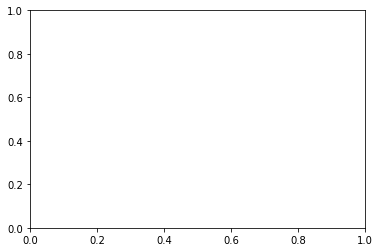

In [17]:
plt.boxplot(df['Cost'])
#plt.title('Distribution of Views (Zoomed In)')
#plt.ylabel('View (in millions)')
#plt.ylim([0,4])
#plt.yticks(np.arange(0,4.1,.2))

plt.tight_layout()
plt.grid()
plt.show()

In [7]:
# Capitalize journal titles so synonymous titles will be uniform.
df['Journal title'] = df['Journal title'].str.capitalize()

C:\Users\Andrew Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
# Group by journal title and count by article title. 
df_counts = df.groupby('Journal title').agg('count').reset_index()[['Journal title', 'Article title']]
df_counts.columns = ['Journal Title', 'Article Counts']

# Order by greatest to least article counts.
df_counts.sort_values('Article Counts', ascending = False)

,Journal Title,Article Counts
772,Plos one,190
510,Journal of biological chemistry,53
700,Neuroimage,29
766,Plos genetics,24
773,Plos pathogens,24
725,Nucleic acids research,23
788,Proceedings of the national academy of sciences,20
770,Plos neglected tropical diseases,20
686,Nature communications,19
417,Human molecular genetics,19


The 5 most common Journals and their respective article counts are: 
* Plos One: 190
* Journal of biological chemistry: 53
* Neuroimage: 29
* Plos genetics: 24
* Plos pathogens: 24

In [ ]:
purchases.loc[lambda df: purchases['items_purchased'] > 1, :]

In [ ]:
purchases[purchases['items_purchased'] > 1]

In [ ]:
purchases.groupby('country').aggregate(np.mean)